In [1]:
# Imported Libraries
import numpy as np
import pandas as pd 
import copy
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

#Sampling Libraries
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Visual Libraries
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Performance metrics libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid

# Tensorflow
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.losses import mse
from keras import backend as K
from keras.optimizers import Adam

from VAE import VAE_oversampling
from GAN import GAN
from CV import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting the random seed 
import random
seed = 42
np.random.seed(seed) 
tf.random.set_seed(42)
random.seed(seed)

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### Train, Validate, Test split

In [4]:
X = df.drop(['Class'], axis=1)
y = df['Class']

#Split data initially to train and remainingfor cross
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the validation dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
print(f"The validation and test datasets have {sorted(Counter(y_test).items())[0][1]} records for the majority class and {sorted(Counter(y_test).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 227845
The number of records in the validation dataset is 56962
The training dataset has 227451 records for the majority class and 394 records for the minority class.
The validation and test datasets have 56864 records for the majority class and 98 records for the minority class.


In [5]:
param_grid_lr = dict(classifier__C = [0.01, 1, 10], 
                     classifier__penalty = ['l1', 'l2'],
                     classifier__solver = ['liblinear', 'saga'])

### Pre-processing

In [6]:
X_train_processed = copy.deepcopy(X_train)
X_test_processed = copy.deepcopy(X_test)

scaler = StandardScaler()

X_train_processed = pd.DataFrame(scaler.fit_transform(X_train_processed[:]), index=X_train_processed.index)
X_test_processed = pd.DataFrame(scaler.transform(X_test_processed[:]), index=X_test_processed.index)

In [7]:
smote = SMOTE(random_state=1)

#transform the dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()

X_train_procesed_smote = pd.DataFrame(scaler.fit_transform(X_train_smote[:]), index=X_train_smote.index)
X_test_processed_smote = pd.DataFrame(scaler.transform(X_test[:]), index=X_test.index)

counter = Counter(y_train_smote)
print(counter)

Counter({0: 227451, 1: 227451})


In [8]:
adasyn = ADASYN(random_state=1)

#transform the dataset
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

scaler = StandardScaler()

X_train_processed_adasyn = pd.DataFrame(scaler.fit_transform(X_train_adasyn[:]), index=X_train_adasyn.index)
X_test_processed_adasyn = pd.DataFrame(scaler.transform(X_test[:]), index=X_test.index)

counter = Counter(y_train_adasyn)
print(counter)

Counter({0: 227451, 1: 227346})


## Original Dataset

Original applied
---------- Validation Results ---------------
Accuracy:, 0.998916 (+/- 0.000057)
Precision: 0.689326 (+/- 0.017964)
Recall: 0.680104 (+/- 0.037938)
F1 score: 0.684074 (+/- 0.021717)
ROC_AUC: 0.904093 (+/- 0.009437)
---------- Training Results -------------
Accuracy:, 0.998962 (+/- 0.000052)
Precision: 0.704870 (+/- 0.024709)
Recall: 0.690356 (+/- 0.011623)
F1 score: 0.697144 (+/- 0.009472)
ROC_AUC: 0.913890 (+/- 0.011241)
################# Training Results ########################
Accuracy: 0.9990037086615902
Precision: 0.7300275482093664
Recall: 0.6725888324873096
F1 score: 0.7001321003963012
ROC_AUC: 0.8360789852277437

Classified 	71 out of 98 	fraud cases correctly
Misclassified 	27 out of 56864 normal cases
Accuracy: 0.9990519995786665
Precision: 0.7244897959183674
Recall: 0.7244897959183674
F1 score: 0.7244897959183674
ROC_AUC: 0.8620074894054415


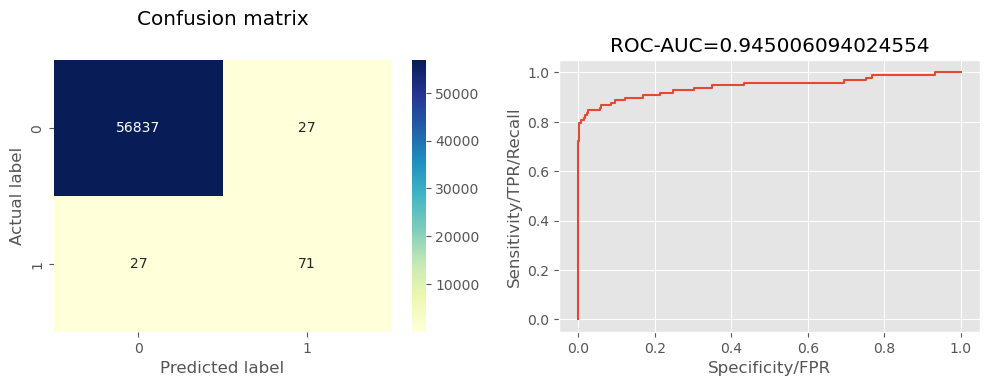

In [11]:
lr = LogisticRegression()

model_cv(X_train, y_train, LogisticRegression(), 'original')

lr.fit(X_train, y_train)

train_predictions = lr.predict(X_train)
print("################# Training Results ########################")
model_scores(y_train, train_predictions)

evaluate_model(X_test, y_test, lr)

## Scaled

---------- Validation Results ---------------
Accuracy:, 0.999201 (+/- 0.000063)
Precision: 0.873903 (+/- 0.028777)
Recall: 0.629309 (+/- 0.031088)
F1 score: 0.731179 (+/- 0.024917)
ROC_AUC: 0.814575 (+/- 0.015543)
---------- Training Results -------------
Accuracy:, 0.999242 (+/- 0.000017)
Precision: 0.887228 (+/- 0.008932)
Recall: 0.643392 (+/- 0.008069)
F1 score: 0.745840 (+/- 0.006226)
ROC_AUC: 0.821625 (+/- 0.004033)
################# Training Results ########################
Accuracy: 0.99923632293884
Precision: 0.8873239436619719
Recall: 0.6395939086294417
F1 score: 0.7433628318584071
ROC_AUC: 0.8197266094931988

Classified 	64 out of 98 	fraud cases correctly
Misclassified 	13 out of 56864 normal cases
Accuracy: 0.9991748885221726
Precision: 0.8311688311688312
Recall: 0.6530612244897959
F1 score: 0.7314285714285713
ROC_AUC: 0.8264163044227257


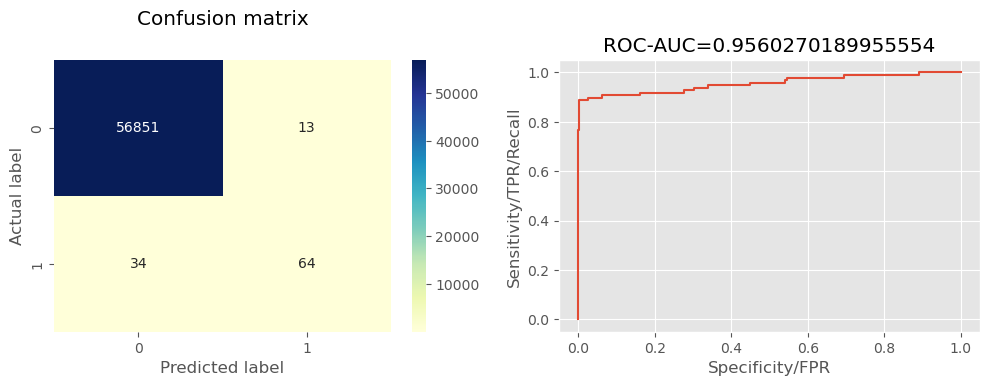

In [21]:
lr = LogisticRegression()

model_cv(X_train, y_train, lr)

lr = LogisticRegression()

lr.fit(X_train_processed, y_train)

train_predictions = lr.predict(X_train_processed)
print("################# Training Results ########################")
model_scores(y_train, train_predictions)

evaluate_model(X_test_processed, y_test, lr)


## With SMOTE

SMOTE applied
SMOTE applied
SMOTE applied
SMOTE applied
SMOTE applied
---------- Validation Results ---------------
Accuracy:, 0.990581 (+/- 0.001038)
Precision: 0.143302 (+/- 0.011459)
Recall: 0.883122 (+/- 0.039256)
F1 score: 0.246234 (+/- 0.015959)
ROC_AUC: 0.936945 (+/- 0.019232)
---------- Training Results -------------
Accuracy:, 0.980015 (+/- 0.002076)
Precision: 0.990464 (+/- 0.000944)
Recall: 0.969363 (+/- 0.003465)
F1 score: 0.979797 (+/- 0.002126)
ROC_AUC: 0.980015 (+/- 0.002076)
################# Training Results ########################
Accuracy: 0.9802287086009734
Precision: 0.990542015278283
Recall: 0.9697165543347798
F1 score: 0.9800186616902159
ROC_AUC: 0.9802287086009734

Classified 	88 out of 98 	fraud cases correctly
Misclassified 	556 out of 56864 normal cases
Accuracy: 0.9900635511393561
Precision: 0.13664596273291926
Recall: 0.8979591836734694
F1 score: 0.23719676549865232
ROC_AUC: 0.9440907342115238


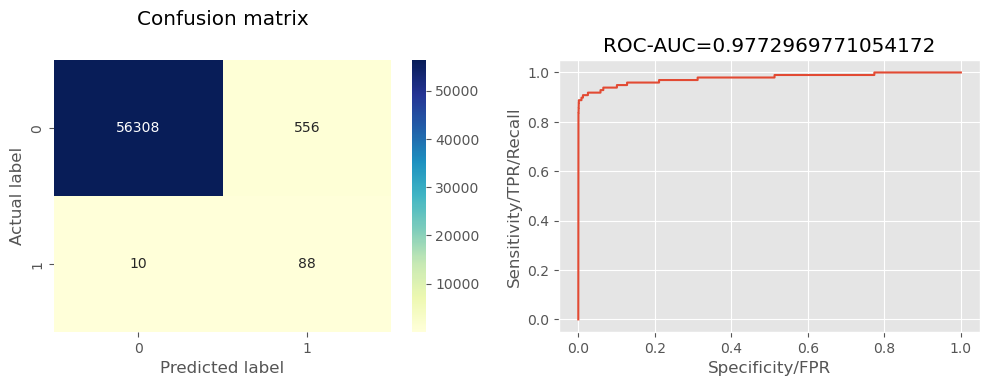

In [22]:
lr = LogisticRegression()

model_cv(X_train, y_train, lr, 'smote')

lr = LogisticRegression()

lr.fit(X_train_procesed_smote, y_train_smote)

train_predictions = lr.predict(X_train_procesed_smote)
print("################# Training Results ########################")
model_scores(y_train_smote, train_predictions)

evaluate_model(X_test_processed_smote, y_test, lr)

## ADASYN

ADASYN applied
ADASYN applied
ADASYN applied
ADASYN applied
ADASYN applied
---------- Validation Results ---------------
Accuracy:, 0.990006 (+/- 0.001120)
Precision: 0.136682 (+/- 0.011700)
Recall: 0.888218 (+/- 0.037466)
F1 score: 0.236566 (+/- 0.016678)
ROC_AUC: 0.939200 (+/- 0.018326)
---------- Training Results -------------
Accuracy:, 0.978911 (+/- 0.002325)
Precision: 0.989923 (+/- 0.001043)
Recall: 0.967671 (+/- 0.003847)
F1 score: 0.978668 (+/- 0.002386)
ROC_AUC: 0.978911 (+/- 0.002326)
################# Training Results ########################
Accuracy: 0.9785156894174764
Precision: 0.9897447902363921
Recall: 0.9670414258443077
F1 score: 0.9782614015845083
ROC_AUC: 0.9785130409400566

Classified 	88 out of 98 	fraud cases correctly
Misclassified 	592 out of 56864 normal cases
Accuracy: 0.989431550858467
Precision: 0.12941176470588237
Recall: 0.8979591836734694
F1 score: 0.22622107969151672
ROC_AUC: 0.9437741894732007


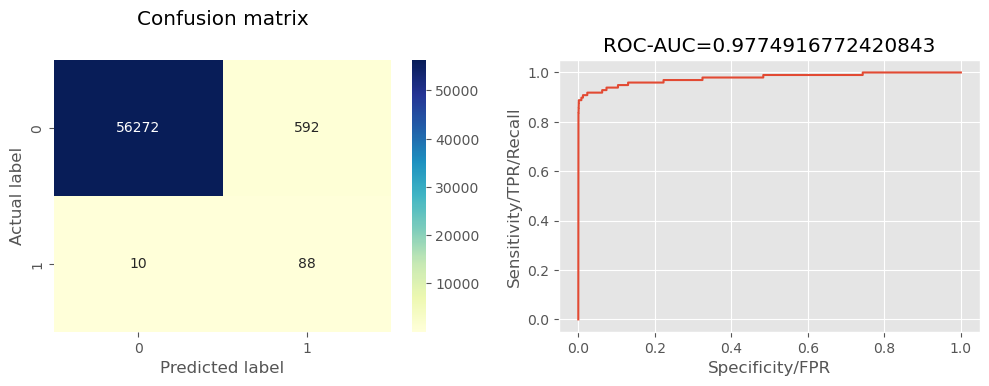

In [18]:
lr = LogisticRegression()

model_cv(X_train, y_train, lr, 'adasyn')

lr = LogisticRegression()

lr.fit(X_train_processed_adasyn, y_train_adasyn)

train_predictions = lr.predict(X_train_processed_adasyn)
print("################# Training Results ########################")
model_scores(y_train_adasyn, train_predictions)

evaluate_model(X_test_processed_adasyn, y_test, lr)

## Data Augmentation with VAE

### Hyperparameter Tuning with cross validation

In [12]:
#With hyperparameter tuning
#Cross validation
skf = StratifiedKFold(n_splits=5)

# Define the hyperparameters to tune
param_grid = {
     'C': [0.01, 0.1, 10], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize variables to store the best hyperparameters and AUC score
best_params = {}
best_scores = []
best_f1 = -np.inf

# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid):
    lst_accuracy = []
    lst_precision = []
    lst_recall = []
    lst_f1_score = []
    lst_roc_auc_score = []
    
    f1_scores = []

    #estimator = RandomForestClassifier(n_estimators=50)
    model = LogisticRegression(C=params['C'], penalty=params['penalty'], solver=params['solver'])

    print("############################### Parameters tested:", params,"################################")
    for count, (train_index, valid_index) in enumerate(skf.split(X_train, y_train)):
        print("------------------------ KFold:", count+1, "---------------------------")
        X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        print(f"The training dataset has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")
        print(f"The test dataset has {sorted(Counter(y_valid_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_valid_fold).items())[1][1]} records for the minority class.")
        
        maj = len(y_train_fold[y_train_fold == 0])
        mino = len(y_train_fold[y_train_fold == 1])
        frac = 0.5
        num_samples = round(1/(1/frac - 1) * maj - mino)

        print("Number of samples to be generated: ", num_samples)

        # Variational Oversampling 
        vos = VAE_oversampling(hidden_dim= 64,
                                latent_dim=2,
                                original_dim=30,
                                minority_class_id=1,
                                epochs=100,
                                batch_size=1,
                                num_samples_to_generate = num_samples,
                                random_state = 0,
                                optimizer="adam")
        

        #Fit the VAE oversampling model and get new data set
        X_res_val,y_res_val = vos.fit_sample(X_train_fold,y_train_fold)
        
        std = StandardScaler()

        X_train_processed = std.fit_transform(X_res_val) 
        X_valid_processed = std.transform(X_valid_fold)


        model.fit(X_train_processed, y_res_val)

        y_pred_test = model.predict(X_valid_processed)

        lst_accuracy.append(accuracy_score(y_valid_fold, y_pred_test))
        lst_precision.append(precision_score(y_valid_fold, y_pred_test))
        lst_recall.append(recall_score(y_valid_fold, y_pred_test))
        lst_f1_score.append(f1_score(y_valid_fold, y_pred_test))
        lst_roc_auc_score.append(roc_auc_score(y_valid_fold, y_pred_test))


    avg_f1 = np.mean(lst_f1_score)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_scores = [lst_accuracy, lst_precision, lst_recall, lst_f1_score, lst_roc_auc_score]
        best_params = params

# Print the best AUC score and hyperparameters
print(f"Accuracy:, {np.mean(best_scores[0]):0.6f} (+/- {np.std(best_scores[0]):0.6f})")
print(f"Precision: {np.mean(best_scores[1]):0.6f} (+/- {np.std(best_scores[1]):0.6f})")
print(f"Recall: {np.mean(best_scores[2]):0.6f} (+/- {np.std(best_scores[2]):0.6f})")
print(f"F1 score: {np.mean(best_scores[3]):0.6f} (+/- {np.std(best_scores[3]):0.6f})")
print(f"ROC_AUC: {np.mean(best_scores[4]):0.6f} (+/- {np.std(best_scores[4]):0.6f})")
print("Best hyperparameters:", best_params)


############################### Parameters tested: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 4ms/step - loss: 34.9030 - val_loss: 28.6999
Epoch 2/100
268/284 [===========================>..] - ETA: 0s - loss: 29.7418

KeyboardInterrupt: 

In [ ]:
print(f"Accuracy:, {np.mean(best_scores[0]):0.6f} (+/- {np.std(best_scores[0]):0.6f})")
print(f"Precision: {np.mean(best_scores[1]):0.6f} (+/- {np.std(best_scores[1]):0.6f})")
print(f"Recall: {np.mean(best_scores[2]):0.6f} (+/- {np.std(best_scores[2]):0.6f})")
print(f"F1 score: {np.mean(best_scores[3]):0.6f} (+/- {np.std(best_scores[3]):0.6f})")
print(f"ROC_AUC: {np.mean(best_scores[4]):0.6f} (+/- {np.std(best_scores[4]):0.6f})")
print("Best hyperparameters:", best_params)

Accuracy:, 0.999381 (+/- 0.000064)
Precision: 0.864615 (+/- 0.011990)
Recall: 0.761246 (+/- 0.040059)
F1 score: 0.809093 (+/- 0.024669)
ROC_AUC: 0.880520 (+/- 0.020026)
Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### Cross Validation

------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
NUmber of samples to be generated:  181644
Epoch 1/100
284/284 [==============================] - 2s 5ms/step - loss: 33.0580 - val_loss: 28.0736
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 29.7000 - val_loss: 26.6554
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 28.7849 - val_loss: 26.6954
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 28.7365 - val_loss: 26.2813
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 28.8101 - val_loss: 25.9407
Epoch 6/100
284/284 [==============================] - 1s 3ms/step - loss: 28.7671 - val_loss: 26.3151
Epoch 7/100
284/284 [==============================] - 1s 4ms/step - loss: 28

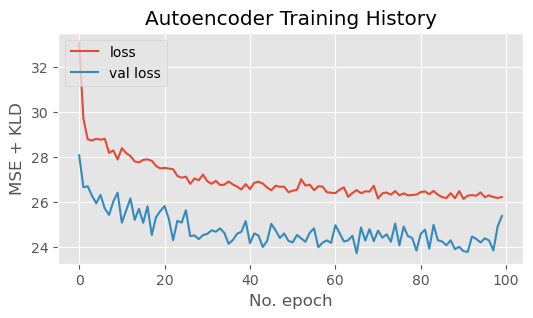

5677/5677 [==============================] - 16s 3ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 6s 14ms/step - loss: 32.9555 - val_loss: 27.7828
Epoch 2/100
283/283 [==============================] - 2s 7ms/step - loss: 29.7336 - val_loss: 25.5843
Epoch 3/100
283/283 [==============================] - 2s 5ms/step - loss: 29.0715 - val_loss: 26.1394
Epoch 4/100
283/283 [==============================] - 2s 6ms/step - loss: 28.8275 - val_loss: 25.3463
Epoch 5/100
283/283 [==============================] - 2s 7ms/step - loss: 28.7576 - val_loss: 25.5940
Epoch 6/100
283/283 [==============================] - 2s 7ms/step - loss: 28.4592 - val_loss: 24.8566
Epoch 7/100
283/28

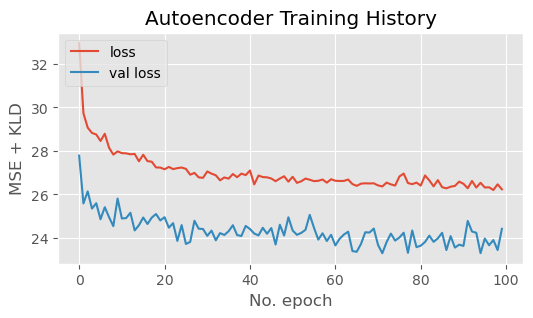

5677/5677 [==============================] - 15s 3ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 32.7888 - val_loss: 26.7945
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 29.7607 - val_loss: 24.7000
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.9894 - val_loss: 25.4079
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 29.0495 - val_loss: 25.1005
Epoch 5/100
283/283 [==============================] - 1s 5ms/step - loss: 28.5901 - val_loss: 25.1272
Epoch 6/100
283/283 [==============================] - 1s 5ms/step - loss: 28.4967 - val_loss: 24.9360
Epoch 7/100
283/283

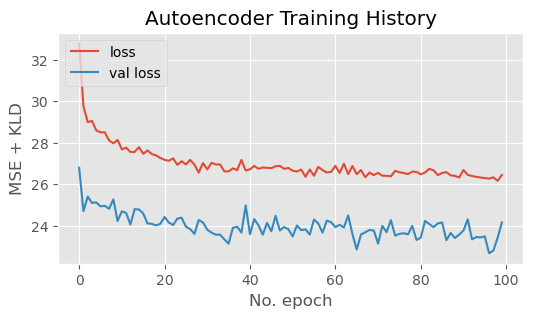

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 3s 7ms/step - loss: 32.2938 - val_loss: 27.9672
Epoch 2/100
283/283 [==============================] - 1s 5ms/step - loss: 29.2038 - val_loss: 27.3262
Epoch 3/100
283/283 [==============================] - 1s 5ms/step - loss: 29.2615 - val_loss: 25.8089
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 28.7967 - val_loss: 26.6734
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 28.3022 - val_loss: 25.7161
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 28.1890 - val_loss: 26.2659
Epoch 7/100
283/283

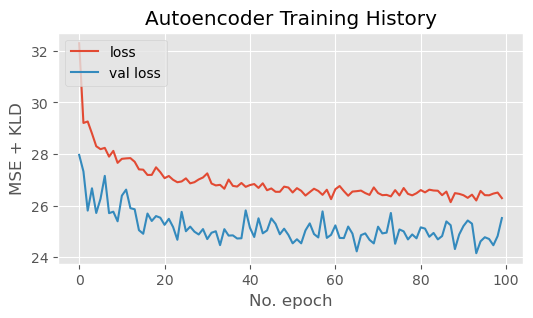

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Epoch 1/100
283/283 [==============================] - 2s 6ms/step - loss: 31.7098 - val_loss: 37.2315
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 28.4562 - val_loss: 37.1420
Epoch 3/100
283/283 [==============================] - 1s 4ms/step - loss: 28.0598 - val_loss: 36.0308
Epoch 4/100
283/283 [==============================] - 1s 4ms/step - loss: 27.6283 - val_loss: 36.6655
Epoch 5/100
283/283 [==============================] - 1s 4ms/step - loss: 27.4971 - val_loss: 36.2370
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 27.4840 - val_loss: 36.2982
Epoch 7/100
283/283

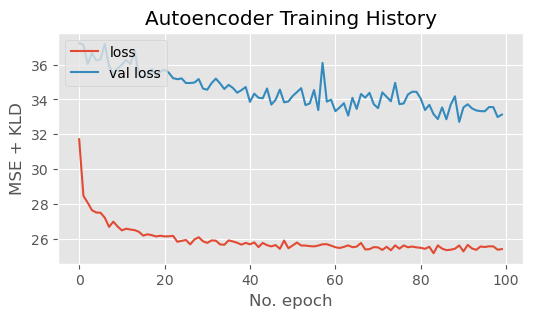

5677/5677 [==============================] - 11s 2ms/step


In [13]:
#Cross validation
skf = StratifiedKFold(n_splits=5)
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1_score = []
lst_roc_auc_score = []

lst_accuracy_train = []
lst_precision_train = []
lst_recall_train = []
lst_f1_score_train = []
lst_roc_auc_score_train = []

model = LogisticRegression()

for count, (train_index, valid_index) in enumerate(skf.split(X_train, y_train)):
    print("------------------------ KFold:", count+1, "---------------------------")
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    print(f"The training dataset has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")
    print(f"The test dataset has {sorted(Counter(y_valid_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_valid_fold).items())[1][1]} records for the minority class.")
    
    maj = len(y_train_fold[y_train_fold == 0])
    mino = len(y_train_fold[y_train_fold == 1])
    frac = 0.5
    num_samples = round(1/(1/frac - 1) * maj - mino)

    print("NUmber of samples to be generated: ", num_samples)

    # Variational Oversampling 
    vos = VAE_oversampling(hidden_dim=256,
                            latent_dim=20,
                            original_dim=30,
                            minority_class_id=1,
                            epochs=100,
                            batch_size=1,
                            num_samples_to_generate = num_samples,
                            random_state = 0,
                            optimizer="adam")
    
    #Fit the VAE oversampling model and get new data set
    X_res_val,y_res_val = vos.fit_sample(X_train_fold,y_train_fold)
    
    std = StandardScaler()
    
    X_train_processed = std.fit_transform(X_res_val) 
    X_valid_processed = std.transform(X_valid_fold)

    model.fit(X_train_processed, y_res_val)
    
    train_predictions = model.predict(X_train_processed)

    y_pred_test = model.predict(X_valid_processed)

    lst_accuracy.append(accuracy_score(y_valid_fold, y_pred_test))
    lst_precision.append(precision_score(y_valid_fold, y_pred_test))
    lst_recall.append(recall_score(y_valid_fold, y_pred_test))
    lst_f1_score.append(f1_score(y_valid_fold, y_pred_test))
    lst_roc_auc_score.append(roc_auc_score(y_valid_fold, y_pred_test))

    lst_accuracy_train.append(accuracy_score(y_res_val, train_predictions))
    lst_precision_train.append(precision_score(y_res_val, train_predictions))
    lst_recall_train.append(recall_score(y_res_val, train_predictions))
    lst_f1_score_train.append(f1_score(y_res_val, train_predictions))
    lst_roc_auc_score_train.append(roc_auc_score(y_res_val, train_predictions))


In [14]:
print('############ Validation #############')
print(f"Accuracy:, {np.mean(lst_accuracy):0.6f} (+/- {np.std(lst_accuracy):0.6f})")
print(f"Precision: {np.mean(lst_precision):0.6f} (+/- {np.std(lst_precision):0.6f})")
print(f"Recall: {np.mean(lst_recall):0.6f} (+/- {np.std(lst_recall):0.6f})")
print(f"F1 score: {np.mean(lst_f1_score):0.6f} (+/- {np.std(lst_f1_score):0.6f})")
print(f"ROC_AUC: {np.mean(lst_roc_auc_score):0.6f} (+/- {np.std(lst_roc_auc_score):0.6f})")

print('############ Training #############')
print(f"Accuracy:, {np.mean(lst_accuracy_train):0.6f} (+/- {np.std(lst_accuracy_train):0.6f})")
print(f"Precision: {np.mean(lst_precision_train):0.6f} (+/- {np.std(lst_precision_train):0.6f})")
print(f"Recall: {np.mean(lst_recall_train):0.6f} (+/- {np.std(lst_recall_train):0.6f})")
print(f"F1 score: {np.mean(lst_f1_score_train):0.6f} (+/- {np.std(lst_f1_score_train):0.6f})")
print(f"ROC_AUC: {np.mean(lst_roc_auc_score_train):0.6f} (+/- {np.std(lst_roc_auc_score_train):0.6f})")

############ Validation #############
Accuracy:, 0.999298 (+/- 0.000028)
Precision: 0.857944 (+/- 0.018566)
Recall: 0.713048 (+/- 0.035053)
F1 score: 0.777900 (+/- 0.015321)
ROC_AUC: 0.856421 (+/- 0.017509)
############ Training #############
Accuracy:, 0.999668 (+/- 0.000008)
Precision: 0.999806 (+/- 0.000014)
Recall: 0.999530 (+/- 0.000010)
F1 score: 0.999668 (+/- 0.000008)
ROC_AUC: 0.999668 (+/- 0.000008)


Epoch 1/100
354/354 [==============================] - 2s 4ms/step - loss: 32.9803 - val_loss: 24.8049
Epoch 2/100
354/354 [==============================] - 1s 3ms/step - loss: 29.2907 - val_loss: 24.5845
Epoch 3/100
354/354 [==============================] - 1s 4ms/step - loss: 29.0799 - val_loss: 25.2125
Epoch 4/100
354/354 [==============================] - 1s 4ms/step - loss: 28.9502 - val_loss: 23.7951
Epoch 5/100
354/354 [==============================] - 1s 3ms/step - loss: 28.9114 - val_loss: 24.0568
Epoch 6/100
354/354 [==============================] - 1s 4ms/step - loss: 28.5538 - val_loss: 24.1755
Epoch 7/100
354/354 [==============================] - 1s 4ms/step - loss: 28.4214 - val_loss: 23.9747
Epoch 8/100
354/354 [==============================] - 1s 3ms/step - loss: 28.1799 - val_loss: 23.9926
Epoch 9/100
354/354 [==============================] - 1s 3ms/step - loss: 28.2241 - val_loss: 23.6250
Epoch 10/100
354/354 [==============================] - 1s 3ms/step - los

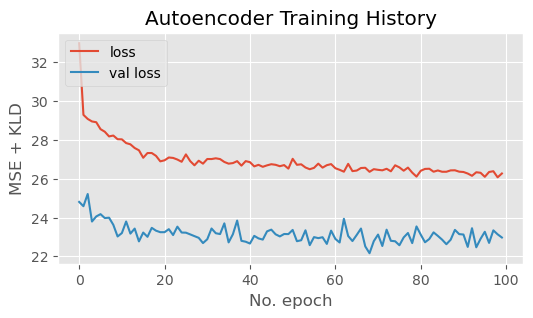

7096/7096 [==============================] - 14s 2ms/step
################# Training Results ########################
Accuracy: 0.9996592672707528
Precision: 0.9997889107796228
Recall: 0.9995295690060716
F1 score: 0.9996592230725767
ROC_AUC: 0.9996592672707528

Classified 	75 out of 98 	fraud cases correctly
Misclassified 	26 out of 56864 normal cases
Accuracy: 0.9991397773954567
Precision: 0.7425742574257426
Recall: 0.7653061224489796
F1 score: 0.7537688442211056
ROC_AUC: 0.8824244455801454


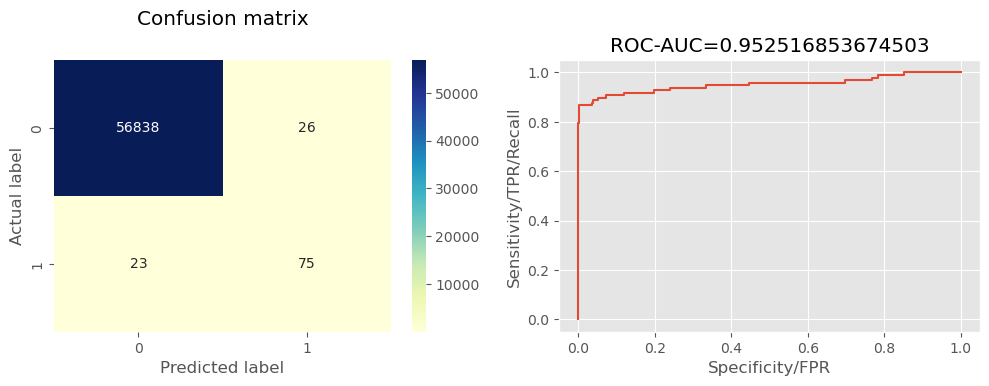

In [15]:
lr = LogisticRegression()

maj = len(y_train[y_train == 0])
mino = len(y_train[y_train == 1])
frac = 0.5
num_samples = round(1/(1/frac - 1) * maj - mino)

vos = VAE_oversampling(hidden_dim=256,
                        latent_dim=20,
                        original_dim=30,
                        minority_class_id=1,
                        epochs=100,
                        batch_size=1,
                        num_samples_to_generate = num_samples,
                        random_state = 0,
                        optimizer="adam")

#Fit the VAE oversampling model and get new data set
X_res_val,y_res_val = vos.fit_sample(X_train,y_train)

std = StandardScaler()

X_train_processed = std.fit_transform(X_res_val) 
X_test_processed = std.transform(X_test)

lr.fit(X_train_processed, y_res_val)

train_predictions = lr.predict(X_train_processed)
print("################# Training Results ########################")
model_scores(y_res_val, train_predictions)

evaluate_model(X_test_processed, y_test, lr)

### One fit

Epoch 1/100
354/354 [==============================] - 6s 13ms/step - loss: 34.6033 - val_loss: 25.9905
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 29.6325 - val_loss: 24.3187
Epoch 3/100
354/354 [==============================] - 2s 6ms/step - loss: 28.4825 - val_loss: 23.7741
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 28.0958 - val_loss: 23.6386
Epoch 5/100
354/354 [==============================] - 2s 5ms/step - loss: 28.0318 - val_loss: 23.5838
Epoch 6/100
354/354 [==============================] - 2s 5ms/step - loss: 27.8937 - val_loss: 23.3982
Epoch 7/100
354/354 [==============================] - 2s 5ms/step - loss: 27.8149 - val_loss: 23.2489
Epoch 8/100
354/354 [==============================] - 2s 5ms/step - loss: 27.6091 - val_loss: 23.3994
Epoch 9/100
354/354 [==============================] - 2s 4ms/step - loss: 27.6666 - val_loss: 23.2086
Epoch 10/100
354/354 [==============================] - 2s 5ms/step - lo

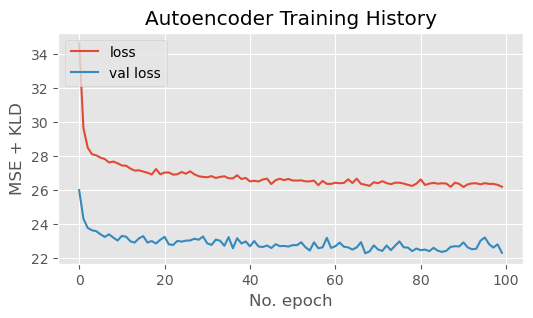

7096/7096 [==============================] - 15s 2ms/step


In [ ]:
maj = len(y_train[y_train == 0])
mino = len(y_train[y_train == 1])
frac = 0.5
num_samples = round(1/(1/frac - 1) * maj - mino)

# Variational Oversampling 
vos = VAE_oversampling(hidden_dim= 64,
                        latent_dim=2,
                        original_dim=30,
                        minority_class_id=1,
                        epochs=100,
                        batch_size=1,
                        num_samples_to_generate = num_samples,
                        random_state = 0,
                        optimizer="adam")

#Fit the VAE oversampling model and get new data set
X_res_val,y_res_val = vos.fit_sample(X_train, y_train)

std = StandardScaler()

X_train_processed = std.fit_transform(X_res_val) 
X_test_processed = std.transform(X_test)

In [ ]:
pd.DataFrame(X_res_val)

0         1         2         3         4         5   \
0       161919.000000  1.946747 -0.752526 -1.355130 -0.661630  1.502822   
1       124477.000000  2.035149 -0.048880 -3.058693  0.247945  2.943487   
2        41191.000000 -0.991920  0.603193  0.711976 -0.992425 -0.825838   
3       132624.000000  2.285718 -1.500239 -0.747565 -1.668119 -1.394143   
4        59359.000000 -0.448747 -1.011440  0.115903 -3.454854  0.715771   
...               ...       ...       ...       ...       ...       ...   
454897   82832.179688 -4.173392  3.668420 -6.578082  4.687133 -2.886705   
454898  100672.437500 -0.155211  3.588729 -0.725867  4.592975  1.438116   
454899  130757.750000  0.102923  3.588729 -1.890665  4.592975  2.088203   
454900   83348.742188 -4.154328  3.604995 -6.710429  4.642052 -2.645648   
454901   82832.195312 -4.706942  7.650697 -7.068217  7.321691 -3.101438   

              6         7         8         9   ...        20        21  \
0       4.024933 -1.479661  1.139880  1.406819  ... -0.134435  0.076197   
1       3.298697 -0.002192  0.674782  0.045826  ... -0.227279  0.038628   
2       1.956261 -2.212603 -5.037523  0.000772  ...  1.280856 -2.798352   
3      -0.350339 -1.427984  0.010010 -1.118447  ... -0.490642 -0.139670   
4      -0.147490  0.504347 -0.113817 -0.044782  ... -0.275297 -0.243245   
...          ...       ...       ...       ...  ...       ...       ...   
454897 -1.318493 -5.278883  0.618234 -2.515834  ...  0.367891  0.807397   
454898 -0.438940 -0.624459  0.587929 -0.172388  ...  0.358018  0.628814   
454899 -1.384610 -1.036765  0.587926 -0.339840  ...  0.358018  0.628814   
454900 -1.387187 -5.203990  1.447973 -2.584458  ...  0.358318  0.721408   
454901 -1.387192 -5.539876  6.883837 -2.589654  ...  0.358042  2.399400   

              22        23        24        25        26        27        28  \
0       0.297537  0.307915  0.690980 -0.350316 -0.388907  0.077641 -0.032248   
1       0.228197  0.035542  0.707090  0.512885 -0.471198  0.002520 -0.069002   
2       0.109526 -0.436530 -0.932803  0.826684  0.913773  0.038049  0.185340   
3       0.077013  0.208310 -0.538236 -0.278032 -0.162068  0.018045 -0.063005   
4      -0.173298 -0.006692 -1.362383 -0.292234 -0.144622 -0.032580 -0.064194   
...          ...       ...       ...       ...       ...       ...       ...   
454897  0.057349 -0.051940 -0.109108  0.019901  0.245528  1.112971  0.079294   
454898  0.051318 -0.062790 -0.109108  0.039748  0.047834  0.156829  0.078113   
454899  0.051318 -0.062790 -0.109108  0.019994  0.047851  0.155962  0.099951   
454900  0.051396 -0.062786 -0.099142  0.020916  0.132864  0.329254  0.353601   
454901  0.051326 -0.062789  0.397487  0.123963  0.050312  0.160008  0.127882   

                29  
0         7.320000  
1         2.990000  
2       175.100000  
3         6.100000  
4        86.100000  
...            ...  
454897  135.423935  
454898  125.768768  
454899  125.591469  
454900  125.591476  
454901  125.591469  

[454902 rows x 30 columns]

In [ ]:
logReg_vae = LogisticRegression()

logReg_vae.fit(X_train_processed, y_res_val)

#predict
pred_lr_vae_val = logReg_vae.predict(X_test_processed)

model_scores(y_test, pred_lr_vae_val)

Accuracy: 0.9991573329588147
Precision: 0.7450980392156863
Recall: 0.7755102040816326
F1 score: 0.76
ROC_AUC: 0.8875264863964719


## Data Augmentation with GAN

### Hyperparameter Tuning

############################### Parameters tested: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_43 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_42 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/

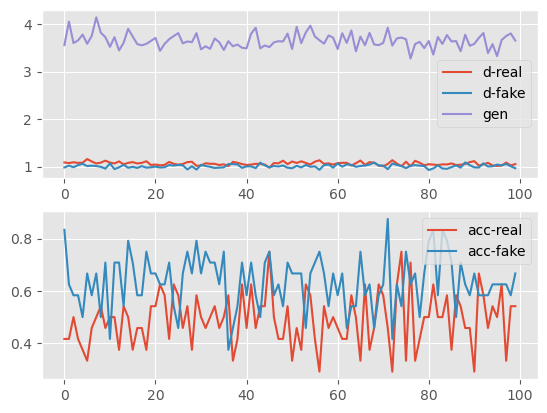

5677/5677 [==============================] - 9s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_46 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_45 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 67ms/step
1 [D loss: 1.048878, acc.: 52

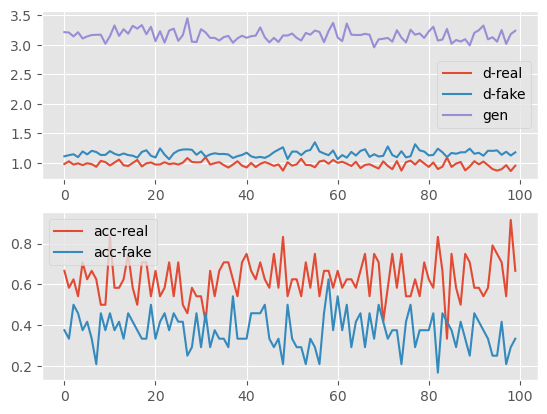

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_49 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_48 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 75ms/step
1 [D loss: 1.166958, acc.: 4

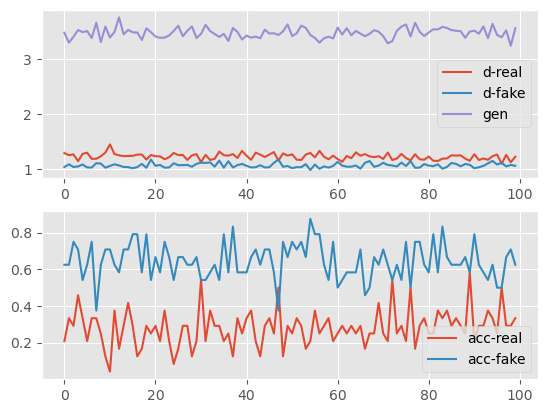

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_52 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_51 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 111ms/step
1 [D loss: 1.104895, acc.: 

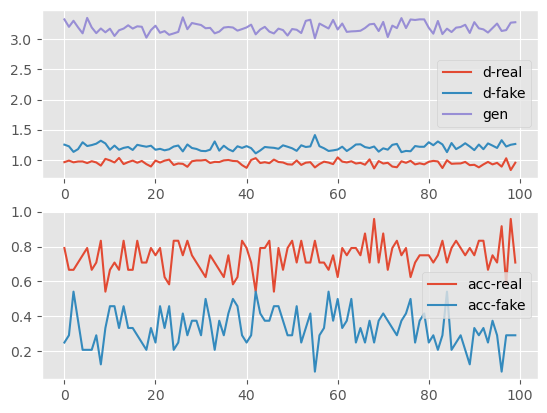

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_55 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_54 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 70ms/step
1 [D loss: 1.249607, acc.: 4

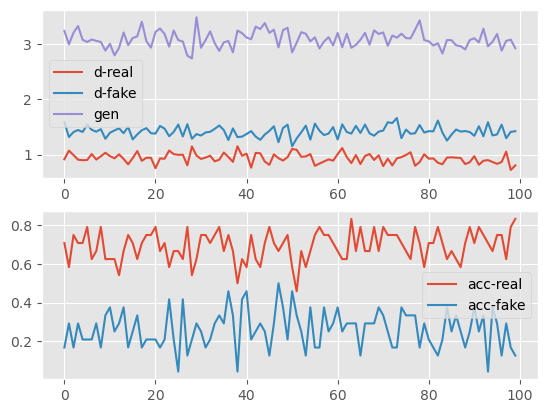

5677/5677 [==============================] - 11s 2ms/step
Average Training F1 Score: 0.999685
Average Validation F1 Score: 0.797131
Average F1 Difference (Overfitting Indicator): -0.188226
############################### Parameters tested: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_58 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_57 (Sequential)  (None, 1)                 841       
                      

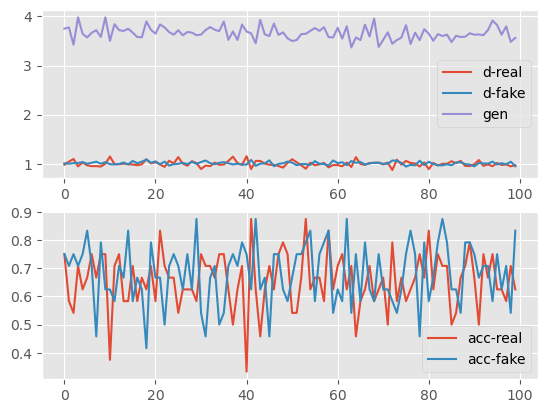

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_61 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_60 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 83ms/step
1 [D loss: 1.312210, acc.: 4

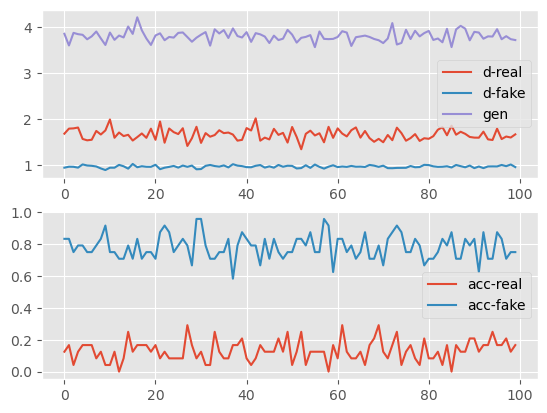

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_64 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_63 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 74ms/step
1 [D loss: 1.681173, acc.: 4

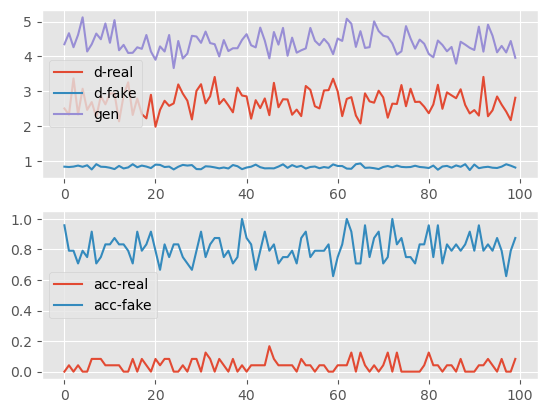

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_67 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_66 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 82ms/step
1 [D loss: 1.465178, acc.: 3

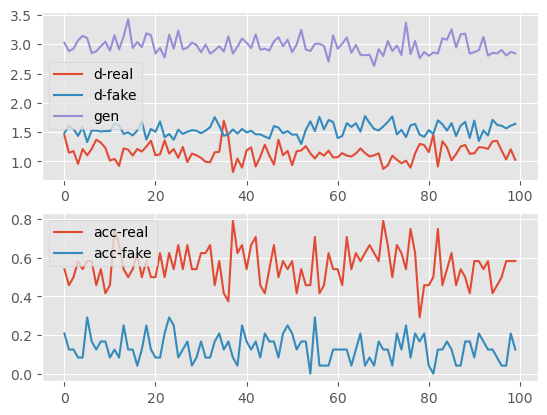

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_70 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_69 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 68ms/step
1 [D loss: 0.988539, acc.: 5

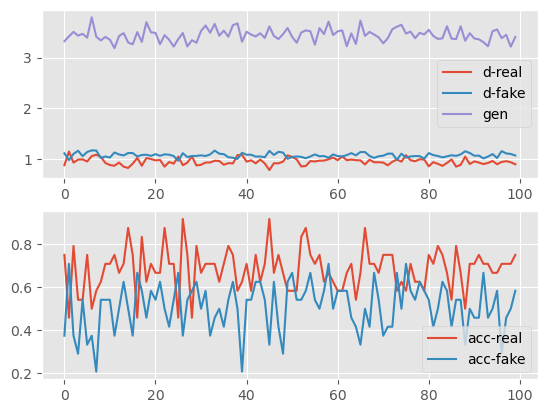

5677/5677 [==============================] - 13s 2ms/step
Average Training F1 Score: 0.999685
Average Validation F1 Score: 0.783960
Average F1 Difference (Overfitting Indicator): -0.188226
############################### Parameters tested: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_73 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_72 (Sequential)  (None, 1)                 841       
                 

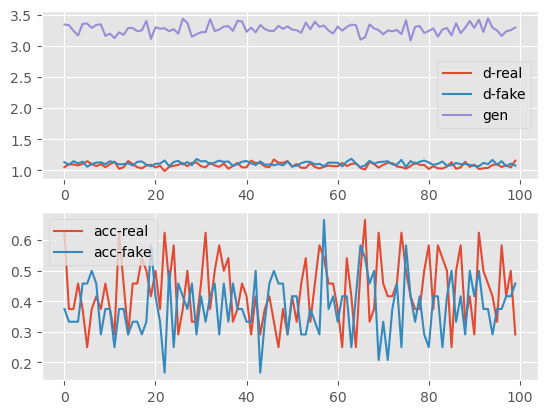

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_76 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_75 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 72ms/step
1 [D loss: 1.233011, acc.: 4

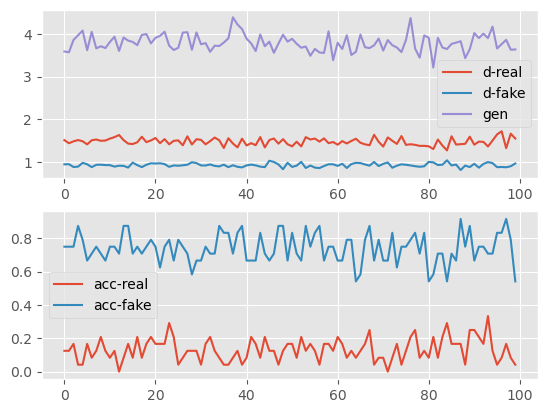

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_79 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_78 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 71ms/step
1 [D loss: 1.112729, acc.: 5

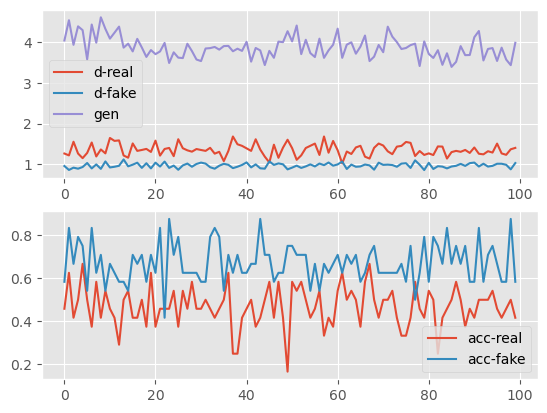

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_82 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_81 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 70ms/step
1 [D loss: 0.999701, acc.: 6

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_85 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_84 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 69ms/step
1 [D loss: 1.036928, acc.: 5

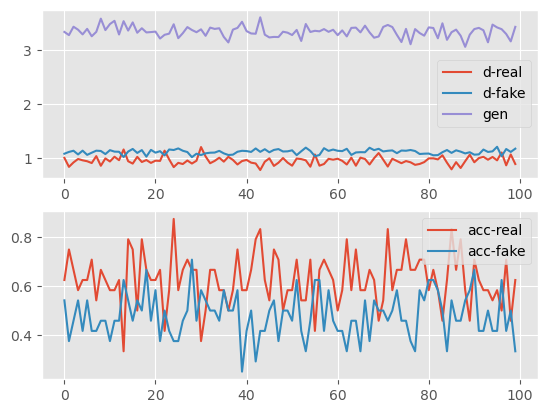

5677/5677 [==============================] - 16s 3ms/step
Average Training F1 Score: 0.999685
Average Validation F1 Score: 0.779007
Average F1 Difference (Overfitting Indicator): -0.188226
############################### Parameters tested: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_88 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_87 (Sequential)  (None, 1)                 841       
                      

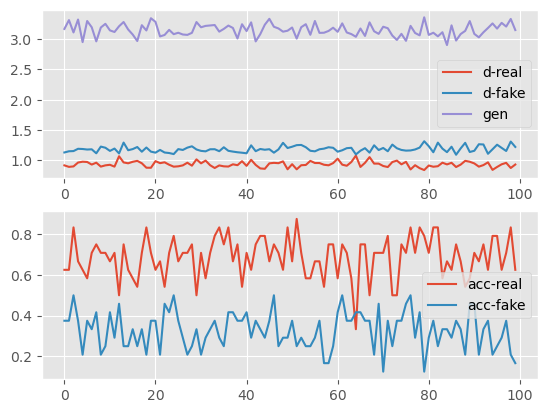

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_91 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_90 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 67ms/step
1 [D loss: 1.260275, acc.: 5

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_94 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_93 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 69ms/step
1 [D loss: 1.518888, acc.: 4

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_97 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_96 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 72ms/step
1 [D loss: 1.199704, acc.: 3

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_100 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_99 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 68ms/step
1 [D loss: 0.993438, acc.: 

5677/5677 [==============================] - 15s 3ms/step
Average Training F1 Score: 0.999685
Average Validation F1 Score: 0.784496
Average F1 Difference (Overfitting Indicator): -0.188226
############################### Parameters tested: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_103 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_102 (Sequential)  (None, 1)                841       
                 

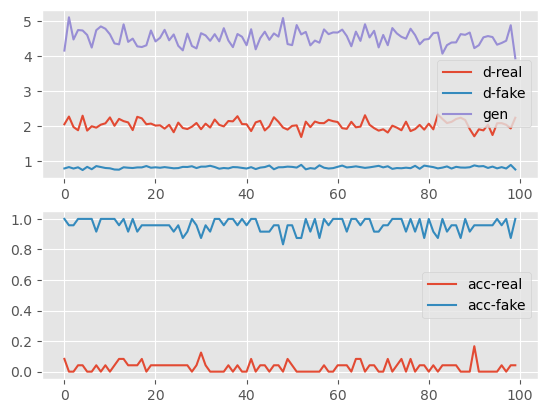

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_106 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_105 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 74ms/step
1 [D loss: 1.185375, acc.: 

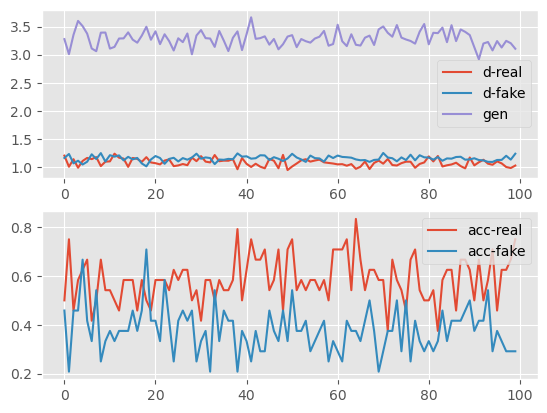

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_109 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_108 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 73ms/step
1 [D loss: 1.129887, acc.: 

5677/5677 [==============================] - 14s 3ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_112 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_111 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 72ms/step
1 [D loss: 1.386940, acc.: 

5677/5677 [==============================] - 10s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_115 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_114 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 65ms/step
1 [D loss: 1.265457, acc.: 

5677/5677 [==============================] - 14s 2ms/step
Average Training F1 Score: 0.999685
Average Validation F1 Score: 0.785746
Average F1 Difference (Overfitting Indicator): -0.188226
############################### Parameters tested: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_118 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_117 (Sequential)  (None, 1)                841       
                      

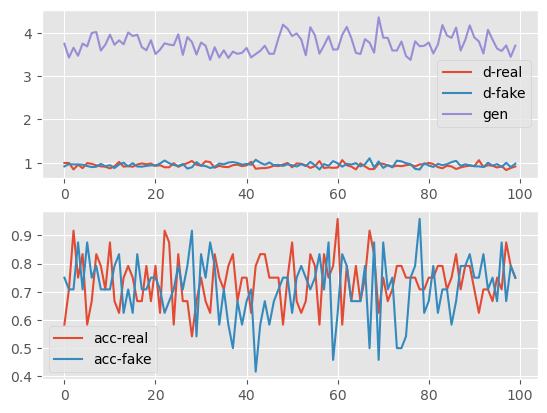

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_121 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_120 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 64ms/step
1 [D loss: 1.303322, acc.: 

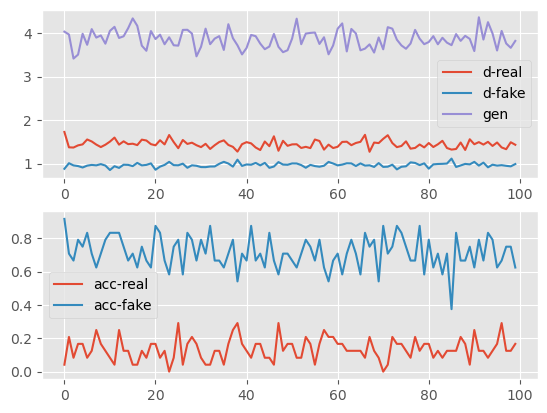

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_124 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_123 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 65ms/step
1 [D loss: 1.031554, acc.: 

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_127 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_126 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 67ms/step
1 [D loss: 1.068605, acc.: 

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_130 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_129 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 66ms/step
1 [D loss: 1.364529, acc.: 

5677/5677 [==============================] - 12s 2ms/step
Average Training F1 Score: 0.999685
Average Validation F1 Score: 0.778306
Average F1 Difference (Overfitting Indicator): -0.188226
############################### Parameters tested: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Model: "sequential_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_133 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_132 (Sequential)  (None, 1)                841       
                 

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_136 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_135 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 71ms/step
1 [D loss: 1.064687, acc.: 

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_139 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_138 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 66ms/step
1 [D loss: 1.161920, acc.: 

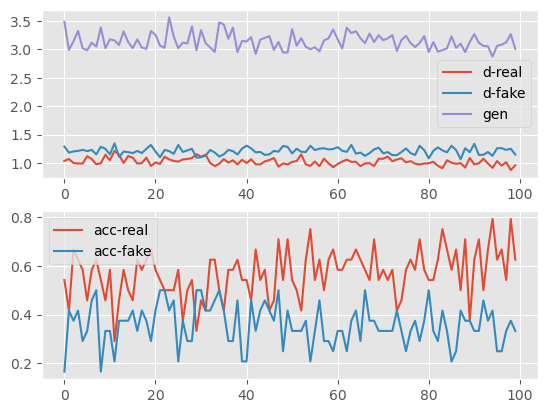

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_142 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_141 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 69ms/step
1 [D loss: 1.076274, acc.: 

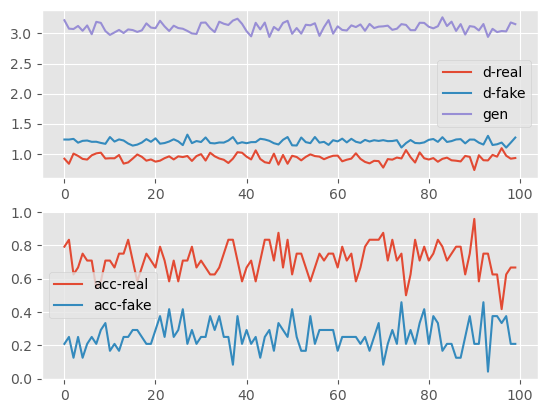

5677/5677 [==============================] - 11s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_145 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_144 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 79ms/step
1 [D loss: 1.497377, acc.: 

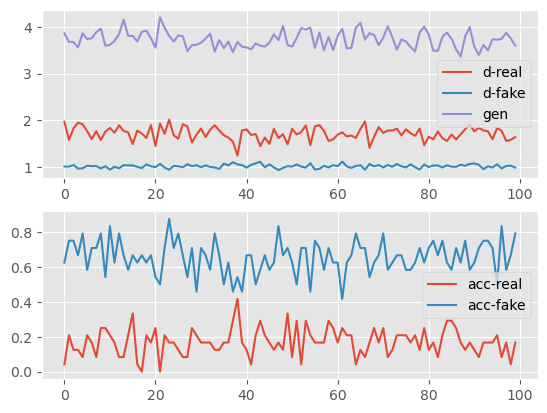

5677/5677 [==============================] - 11s 2ms/step
Average Training F1 Score: 0.999685
Average Validation F1 Score: 0.792047
Average F1 Difference (Overfitting Indicator): -0.188226
############################### Parameters tested: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'} ################################
------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
Number of samples to be generated:  181644
Model: "sequential_149"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_148 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_147 (Sequential)  (None, 1)                841       
                      

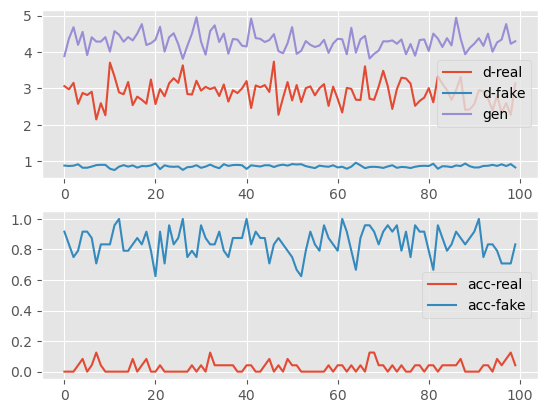

5677/5677 [==============================] - 14s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_152"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_151 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_150 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 120ms/step
1 [D loss: 1.242486, acc.:

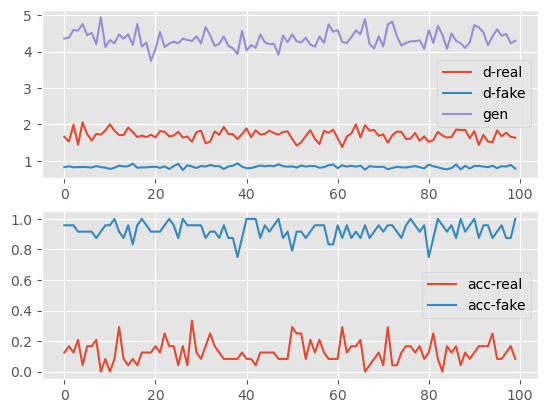

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_154 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_153 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 92ms/step
1 [D loss: 0.975991, acc.: 

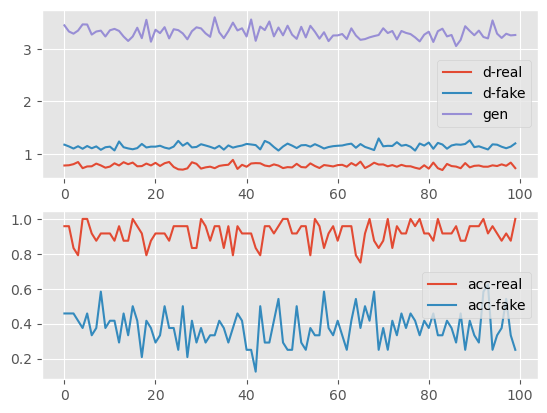

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_157 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_156 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 65ms/step
1 [D loss: 1.178642, acc.: 

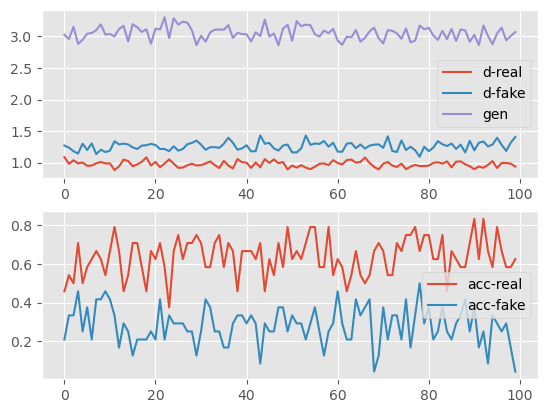

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
Number of samples to be generated:  181646
Model: "sequential_161"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_160 (Sequential)  (None, 30)               16734     
                                                                 
 sequential_159 (Sequential)  (None, 1)                841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 64ms/step
1 [D loss: 1.389878, acc.: 

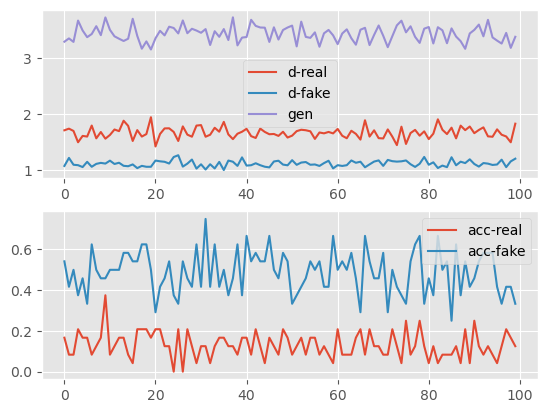

5677/5677 [==============================] - 12s 2ms/step
Average Training F1 Score: 0.999685
Average Validation F1 Score: 0.797292
Average F1 Difference (Overfitting Indicator): -0.188226


In [19]:
#With hyperparameter tuning
#Cross validation
skf = StratifiedKFold(n_splits=5)

# Define the hyperparameters to tune
param_grid = {
     'C': [0.01, 0.1], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize variables to store the best hyperparameters and AUC score
best_params = {}
best_scores = []
train_scores = []
best_f1 = -np.inf

# Lists to store learning curve data
train_f1_scores = []
valid_f1_scores = []

# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid):
    lst_accuracy = []
    lst_precision = []
    lst_recall = []
    lst_f1_score = []
    lst_roc_auc_score = []

    lst_accuracy_train = []
    lst_precision_train = []
    lst_recall_train = []
    lst_f1_score_train = []
    lst_roc_auc_score_train = []
    
    model = LogisticRegression(C=params['C'], penalty=params['penalty'], solver=params['solver'])

    print("############################### Parameters tested:", params,"################################")
    for count, (train_index, valid_index) in enumerate(skf.split(X_train, y_train)):
        print("------------------------ KFold:", count+1, "---------------------------")
        X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        print(f"The training dataset has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")
        print(f"The test dataset has {sorted(Counter(y_valid_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_valid_fold).items())[1][1]} records for the minority class.")
        
        maj = len(y_train_fold[y_train_fold == 0])
        mino = len(y_train_fold[y_train_fold == 1])
        frac = 0.5
        num_samples = round(1/(1/frac - 1) * maj - mino)

        print("Number of samples to be generated: ", num_samples)

        # Variational Oversampling 
        gan = GAN( generator_output_dim=30, 
              discriminator_input_dim=30,
              noise_dim=50,
              num_samples=num_samples, 
              epochs=100, 
              batch_size=24,
              dropout=0.4)
        
        #Fit the VAE oversampling model and get new data set
        X_res_val,y_res_val = gan.fit_sample(X_train_fold,y_train_fold)
        
        std = StandardScaler()

        X_train_processed = std.fit_transform(X_res_val) 
        X_valid_processed = std.transform(X_valid_fold)


        model.fit(X_train_processed, y_res_val)
        y_pred_train = model.predict(X_train_processed)
        y_pred_test = model.predict(X_valid_processed)

        lst_accuracy.append(accuracy_score(y_valid_fold, y_pred_test))
        lst_precision.append(precision_score(y_valid_fold, y_pred_test))
        lst_recall.append(recall_score(y_valid_fold, y_pred_test))
        lst_f1_score.append(f1_score(y_valid_fold, y_pred_test))
        lst_roc_auc_score.append(roc_auc_score(y_valid_fold, y_pred_test))

        lst_accuracy_train.append(accuracy_score(y_res_val, y_pred_train))
        lst_precision_train.append(precision_score(y_res_val, y_pred_train))
        lst_recall_train.append(recall_score(y_res_val, y_pred_train))
        lst_f1_score_train.append(f1_score(y_res_val, y_pred_train))
        lst_roc_auc_score_train.append(roc_auc_score(y_res_val, y_pred_train))

        # Calculate F1 score on training and validation sets
        train_f1 = f1_score(y_res_val, y_pred_train)
        valid_f1 = f1_score(y_valid_fold, y_pred_test)

        # Append F1 scores for learning curve analysis
        train_f1_scores.append(train_f1)
        valid_f1_scores.append(valid_f1)


    avg_f1 = np.mean(lst_f1_score)

    if avg_f1 > best_f1:
        best_f1 = avg_f1_train
        best_scores = [lst_accuracy, lst_precision, lst_recall, lst_f1_score, lst_roc_auc_score]
        train_scores = [lst_accuracy_train, lst_precision_train, lst_recall_train, lst_f1_score_train, lst_roc_auc_score_train]
        best_params = params
    
    print(f"Average Training F1 Score: {avg_f1_train:.6f}")
    print(f"Average Validation F1 Score: {avg_f1:.6f}")
    print(f"Average F1 Difference (Overfitting Indicator): {avg_f1_diff:.6f}")

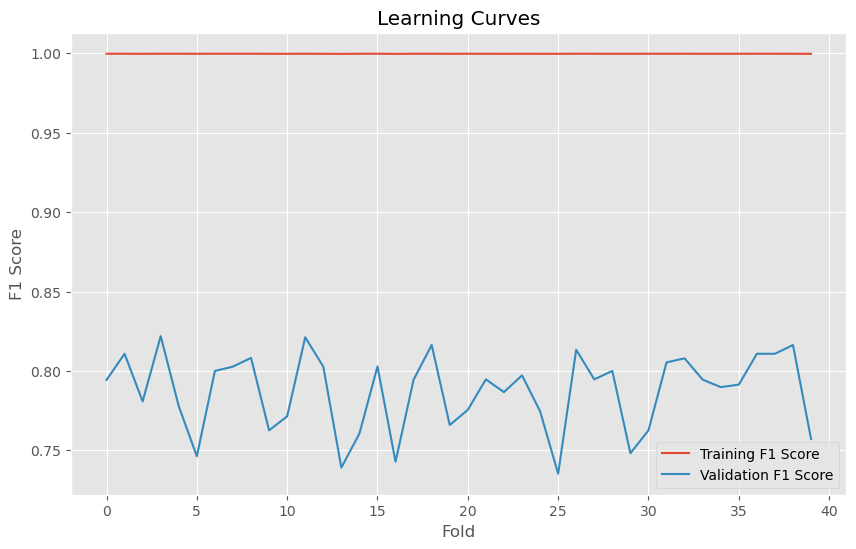

Accuracy:, 0.999355 (+/- 0.000051)
Precision: 0.873252 (+/- 0.016720)
Recall: 0.733463 (+/- 0.021651)
F1 score: 0.797131 (+/- 0.017029)
ROC_AUC: 0.866639 (+/- 0.010829)
Best hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Training scores
Accuracy:, 0.999685 (+/- 0.000018)
Precision: 0.999828 (+/- 0.000013)
Recall: 0.999541 (+/- 0.000042)
F1 score: 0.999685 (+/- 0.000018)
ROC_AUC: 0.999685 (+/- 0.000018)


In [20]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_f1_scores, label='Training F1 Score')
plt.plot(valid_f1_scores, label='Validation F1 Score')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Print the best AUC score and hyperparameters
print(f"Accuracy:, {np.mean(best_scores[0]):0.6f} (+/- {np.std(best_scores[0]):0.6f})")
print(f"Precision: {np.mean(best_scores[1]):0.6f} (+/- {np.std(best_scores[1]):0.6f})")
print(f"Recall: {np.mean(best_scores[2]):0.6f} (+/- {np.std(best_scores[2]):0.6f})")
print(f"F1 score: {np.mean(best_scores[3]):0.6f} (+/- {np.std(best_scores[3]):0.6f})")
print(f"ROC_AUC: {np.mean(best_scores[4]):0.6f} (+/- {np.std(best_scores[4]):0.6f})")
print("Best hyperparameters:", best_params)

print("Training scores")
print(f"Accuracy:, {np.mean(train_scores[0]):0.6f} (+/- {np.std(train_scores[0]):0.6f})")
print(f"Precision: {np.mean(train_scores[1]):0.6f} (+/- {np.std(train_scores[1]):0.6f})")
print(f"Recall: {np.mean(train_scores[2]):0.6f} (+/- {np.std(train_scores[2]):0.6f})")
print(f"F1 score: {np.mean(train_scores[3]):0.6f} (+/- {np.std(train_scores[3]):0.6f})")
print(f"ROC_AUC: {np.mean(train_scores[4]):0.6f} (+/- {np.std(train_scores[4]):0.6f})")


### Cross Validation

------------------------ KFold: 1 ---------------------------
The training dataset has 181960 records for the majority class and 316 records for the minority class.
The test dataset has 45491 records for the majority class and 78 records for the minority class.
NUmber of samples to be generated:  181644
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 30)                16734     
                                                                 
 sequential_3 (Sequential)   (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 135ms/step
1 [D loss: 1.053293, acc.: 52.08%] [G loss: 3.223380]
1/1 [===========================

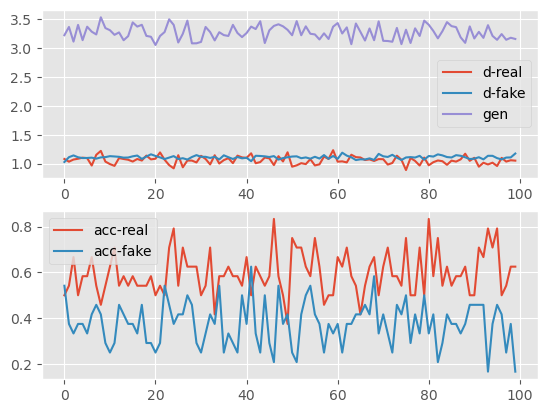

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 2 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 30)                16734     
                                                                 
 sequential_6 (Sequential)   (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 107ms/step
1 [D loss: 1.742135, acc.: 2

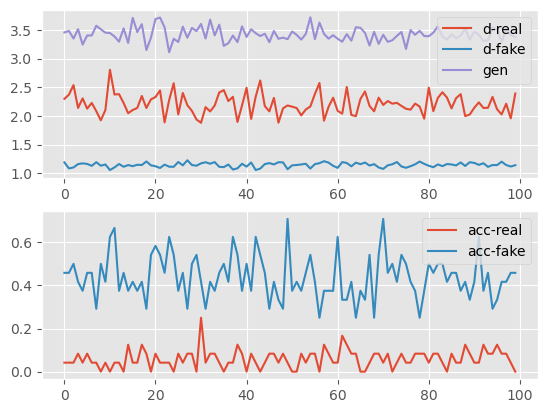

5677/5677 [==============================] - 12s 2ms/step
------------------------ KFold: 3 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_9 (Sequential)   (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 115ms/step
1 [D loss: 0.750439, acc.: 

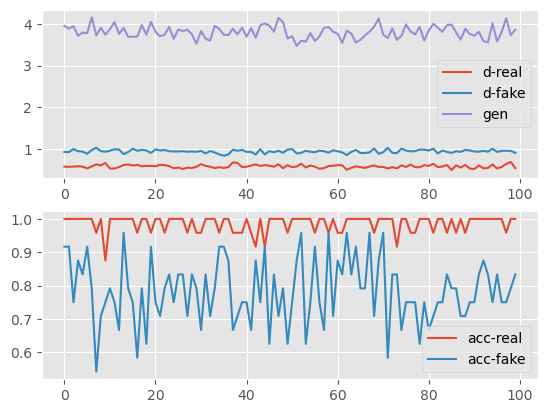

5677/5677 [==============================] - 13s 2ms/step
------------------------ KFold: 4 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_12 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 123ms/step
1 [D loss: 1.255414, acc.: 

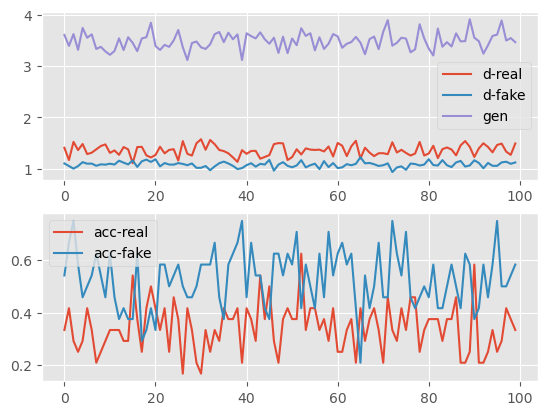

5677/5677 [==============================] - 16s 3ms/step
------------------------ KFold: 5 ---------------------------
The training dataset has 181961 records for the majority class and 315 records for the minority class.
The test dataset has 45490 records for the majority class and 79 records for the minority class.
NUmber of samples to be generated:  181646
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_15 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 114ms/step
1 [D loss: 1.344342, acc.: 

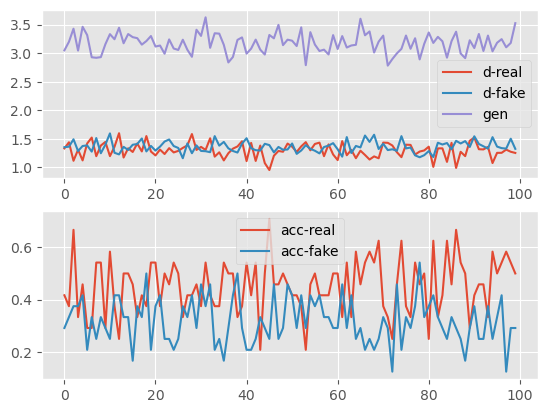

5677/5677 [==============================] - 12s 2ms/step


In [7]:
#Cross validation
skf = StratifiedKFold(n_splits=5)
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1_score = []
lst_roc_auc_score = []

lst_accuracy_train = []
lst_precision_train = []
lst_recall_train = []
lst_f1_score_train = []
lst_roc_auc_score_train = []

model = LogisticRegression()

for count, (train_index, valid_index) in enumerate(skf.split(X_train, y_train)):
    print("------------------------ KFold:", count+1, "---------------------------")
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    print(f"The training dataset has {sorted(Counter(y_train_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_train_fold).items())[1][1]} records for the minority class.")
    print(f"The test dataset has {sorted(Counter(y_valid_fold).items())[0][1]} records for the majority class and {sorted(Counter(y_valid_fold).items())[1][1]} records for the minority class.")
    
    maj = len(y_train_fold[y_train_fold == 0])
    mino = len(y_train_fold[y_train_fold == 1])
    frac = 0.5
    num_samples = round(1/(1/frac - 1) * maj - mino)

    print("NUmber of samples to be generated: ", num_samples)
    
    gan = GAN(generator_output_dim=30, 
              discriminator_input_dim=30,
              noise_dim=50,
              num_samples=num_samples, 
              epochs=100, 
              batch_size=24,
              dropout=0.4)

    #Fit the GAN oversampling model and get new data set
    X_res_val,y_res_val = gan.fit_sample(X_train_fold, y_train_fold)

    std = StandardScaler()
    
    X_train_processed = std.fit_transform(X_res_val) 
    X_valid_processed = std.transform(X_valid_fold)

    model.fit(X_train_processed, y_res_val)

    train_predictions = model.predict(X_train_processed)
    
    y_pred_test = model.predict(X_valid_processed)

    lst_accuracy.append(accuracy_score(y_valid_fold, y_pred_test))
    lst_precision.append(precision_score(y_valid_fold, y_pred_test))
    lst_recall.append(recall_score(y_valid_fold, y_pred_test))
    lst_f1_score.append(f1_score(y_valid_fold, y_pred_test))
    lst_roc_auc_score.append(roc_auc_score(y_valid_fold, y_pred_test))

    lst_accuracy_train.append(accuracy_score(y_res_val, train_predictions))
    lst_precision_train.append(precision_score(y_res_val, train_predictions))
    lst_recall_train.append(recall_score(y_res_val, train_predictions))
    lst_f1_score_train.append(f1_score(y_res_val, train_predictions))
    lst_roc_auc_score_train.append(roc_auc_score(y_res_val, train_predictions))



In [8]:
print('############ Validation #############')
print(f"Accuracy:, {np.mean(lst_accuracy):0.6f} (+/- {np.std(lst_accuracy):0.6f})")
print(f"Precision: {np.mean(lst_precision):0.6f} (+/- {np.std(lst_precision):0.6f})")
print(f"Recall: {np.mean(lst_recall):0.6f} (+/- {np.std(lst_recall):0.6f})")
print(f"F1 score: {np.mean(lst_f1_score):0.6f} (+/- {np.std(lst_f1_score):0.6f})")
print(f"ROC_AUC: {np.mean(lst_roc_auc_score):0.6f} (+/- {np.std(lst_roc_auc_score):0.6f})")

print('############ Training #############')
print(f"Accuracy:, {np.mean(lst_accuracy_train):0.6f} (+/- {np.std(lst_accuracy_train):0.6f})")
print(f"Precision: {np.mean(lst_precision_train):0.6f} (+/- {np.std(lst_precision_train):0.6f})")
print(f"Recall: {np.mean(lst_recall_train):0.6f} (+/- {np.std(lst_recall_train):0.6f})")
print(f"F1 score: {np.mean(lst_f1_score_train):0.6f} (+/- {np.std(lst_f1_score_train):0.6f})")
print(f"ROC_AUC: {np.mean(lst_roc_auc_score_train):0.6f} (+/- {np.std(lst_roc_auc_score_train):0.6f})")

############ Validation #############
Accuracy:, 0.999359 (+/- 0.000073)
Precision: 0.856358 (+/- 0.017990)
Recall: 0.756183 (+/- 0.038323)
F1 score: 0.802714 (+/- 0.026115)
ROC_AUC: 0.877982 (+/- 0.019162)
############ Training #############
Accuracy:, 0.999686 (+/- 0.000019)
Precision: 0.999801 (+/- 0.000028)
Recall: 0.999571 (+/- 0.000020)
F1 score: 0.999686 (+/- 0.000019)
ROC_AUC: 0.999686 (+/- 0.000019)


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_19 (Sequential)  (None, 30)                16734     
                                                                 
 sequential_18 (Sequential)  (None, 1)                 841       
                                                                 
Total params: 17,575
Trainable params: 16,734
Non-trainable params: 841
_________________________________________________________________
1/1 [==============================] - 0s 109ms/step
1 [D loss: 1.291689, acc.: 58.33%] [G loss: 4.254344]
1/1 [==============================] - 0s 61ms/step
2 [D loss: 1.276001, acc.: 52.08%] [G loss: 3.848677]
1/1 [==============================] - 0s 78ms/step
3 [D loss: 1.260895, acc.: 54.17%] [G loss: 3.983081]
1/1 [==============================] - 0s 62ms/step
4 [D loss: 1.095235, acc.: 50.00%] [G loss: 3.591611]
1/1 [=============

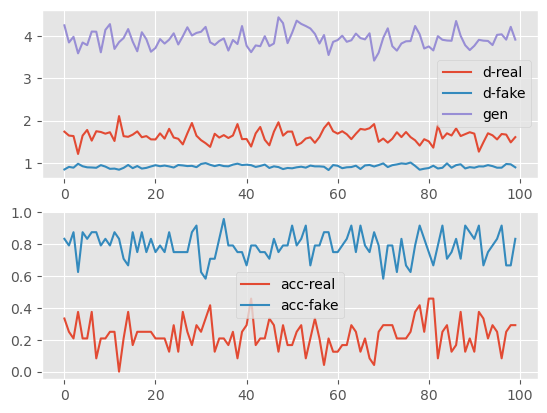

7096/7096 [==============================] - 24s 3ms/step
################# Training Results ########################
Accuracy: 0.9996526724437351
Precision: 0.9997933039267856
Recall: 0.9995119828006911
F1 score: 0.9996526235714694
ROC_AUC: 0.9996526724437351

Classified 	72 out of 98 	fraud cases correctly
Misclassified 	20 out of 56864 normal cases
Accuracy: 0.9991924440855307
Precision: 0.782608695652174
Recall: 0.7346938775510204
F1 score: 0.7578947368421053
ROC_AUC: 0.867171080587553


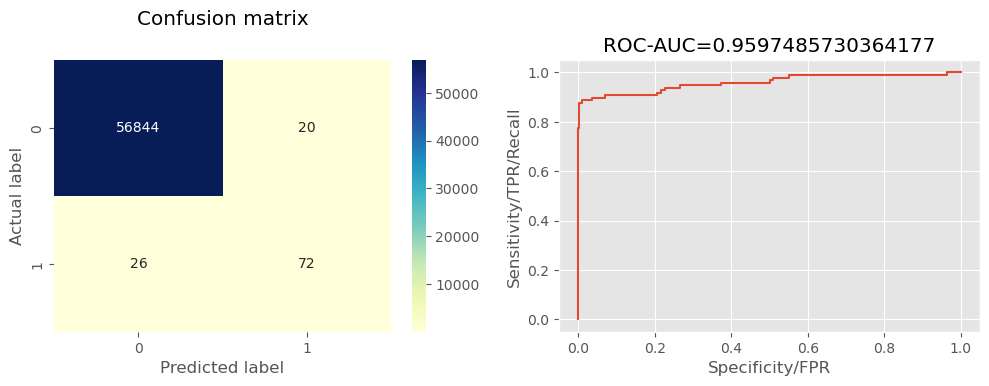

In [10]:
lr = LogisticRegression()

maj = len(y_train[y_train == 0])
mino = len(y_train[y_train == 1])
frac = 0.5
num_samples = round(1/(1/frac - 1) * maj - mino)

gan = GAN(generator_output_dim=30, 
            discriminator_input_dim=30,
            noise_dim=50,
            num_samples=num_samples, 
            epochs=100, 
            batch_size=24,
            dropout=0.4)


X_res_val_gan,y_res_val_gan = gan.fit_sample(X_train, y_train)

std = StandardScaler()
    
X_train_processed = std.fit_transform(X_res_val_gan) 
X_test_processed = std.transform(X_test)

lr.fit(X_train_processed, y_res_val_gan)

train_predictions = lr.predict(X_train_processed)
print("################# Training Results ########################")
model_scores(y_res_val_gan, train_predictions)

evaluate_model(X_test_processed, y_test, lr)

### One fit

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

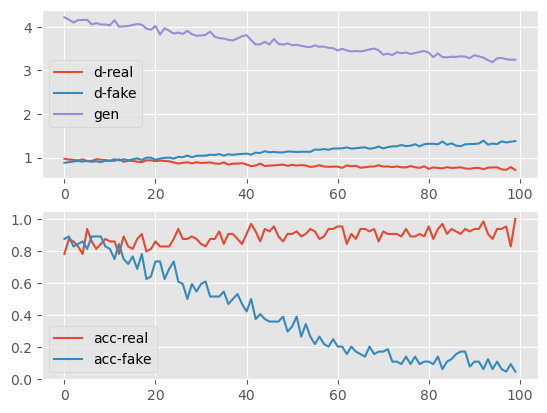

7096/7096 [==============================] - 18s 3ms/step


<Figure size 640x480 with 0 Axes>

In [6]:
maj = len(y_train[y_train == 0])
mino = len(y_train[y_train == 1])
frac = 0.5
num_samples = round(1/(1/frac - 1) * maj - mino)

gan = GAN(input_dim= 30, 
            generator_output_dim=30, 
            discriminator_input_dim=30,
            noise_dim=100,
            num_samples=num_samples, 
            epochs=100, 
            batch_size=64,
            dropout=0.1)

#Fit the GAN oversampling model and get new data set
X_res_val_gan,y_res_val_gan = gan.fit_sample(X_train, y_train)

std = StandardScaler()

X_train_processed_gan = std.fit_transform(X_res_val_gan)
X_test_processed_gan = std.transform(X_test)

In [7]:
logReg_vae = LogisticRegression()

logReg_vae.fit(X_train_processed_gan, y_res_val_gan)

#predict
pred_lr_vae_val = logReg_vae.predict(X_test_processed_gan)

model_scores(y_test, pred_lr_vae_val)

Accuracy: 0.9991924440855307
Precision: 0.825
Recall: 0.673469387755102
F1 score: 0.7415730337078652
ROC_AUC: 0.836611593145981
